In [1]:
import pandas as pd
import os

# Setup

# Define the directory where the processed (cleaned) data is stored
processed_data_dir = r"C:\Users\matth\OneDrive\Documents\data_science_project\premier-league-home-advantage\data\processed_data"

# Define the path to the combined team stats file
team_stats_file = os.path.join(processed_data_dir, "all_seasons_team_data.csv")

# Define the directory to save analysis outputs (figures, tables)
output_dir = r"C:\Users\matth\OneDrive\Documents\data_science_project\premier-league-home-advantage\output"
figures_dir = os.path.join(output_dir, "figures")
tables_dir = os.path.join(output_dir, "tables")

# Create output directories if they don't exist
os.makedirs(figures_dir, exist_ok=True)
os.makedirs(tables_dir, exist_ok=True)

print("Output directories ensured exist:")
print(f"- Figures: {figures_dir}")
print(f"- Tables: {tables_dir}")

Output directories ensured exist:
- Figures: C:\Users\matth\OneDrive\Documents\data_science_project\premier-league-home-advantage\output\figures
- Tables: C:\Users\matth\OneDrive\Documents\data_science_project\premier-league-home-advantage\output\tables


In [5]:
# Load Data

# Load the combined team stats data
try:
    team_stats_df = pd.read_csv(team_stats_file, encoding='utf-8')
    print(f"\nSuccessfully loaded team stats data from: {team_stats_file}")
except FileNotFoundError:
    print(f"Error: File not found at {team_stats_file}. Please ensure the file exists.")
    # Exit or handle error appropriately if the file is critical
    team_stats_df = None
except Exception as e:
    print(f"An error occurred loading the team stats data: {e}")
    team_stats_df = None


Successfully loaded team stats data from: C:\Users\matth\OneDrive\Documents\data_science_project\premier-league-home-advantage\data\processed_data\all_seasons_team_data.csv


In [3]:
# Analysis: Overall Home Advantage (League Average 2018-2024)

if team_stats_df is not None:
    print("\nCalculating overall league average home advantage (2018-2024)...")

    # Calculate overall average Home Points Per Game (PPG)
    overall_avg_home_ppg = team_stats_df['home_points_avg'].mean()

    # Calculate overall average Away Points Per Game (PPG)
    overall_avg_away_ppg = team_stats_df['away_points_avg'].mean()

    # Calculate the overall average PPG difference (Home - Away)
    overall_ppg_diff = overall_avg_home_ppg - overall_avg_away_ppg

    # Calculate overall average Home xG Difference per 90
    overall_avg_home_xg_diff_90 = team_stats_df['home_xg_diff_per90'].mean()

    # Calculate overall average Away xG Difference per 90
    overall_avg_away_xg_diff_90 = team_stats_df['away_xg_diff_per90'].mean()

    # Calculate the overall average xG Difference per 90 difference (Home - Away)
    overall_xg_diff_90_diff = overall_avg_home_xg_diff_90 - overall_avg_away_xg_diff_90

    # Print the results
    print("\n--- Overall League Average Home Advantage (2018-2024) ---")
    print(f"Average Home PPG: {overall_avg_home_ppg:.2f}")
    print(f"Average Away PPG: {overall_avg_away_ppg:.2f}")
    print(f"Average Home Advantage (PPG Difference): {overall_ppg_diff:.2f} points per game")
    print("-" * 60)
    print(f"Average Home xG Difference per 90: {overall_avg_home_xg_diff_90:.2f}")
    print(f"Average Away xG Difference per 90: {overall_avg_away_xg_diff_90:.2f}")
    print(f"Average Home Advantage (xG Diff per 90 Difference): {overall_xg_diff_90_diff:.2f} xG per 90 minutes")
    print("-" * 60)
else:
    print("\nSkipping analysis because team stats data failed to load.")


Calculating overall league average home advantage (2018-2024)...

--- Overall League Average Home Advantage (2018-2024) ---
Average Home PPG: 1.56
Average Away PPG: 1.22
Average Home Advantage (PPG Difference): 0.34 points per game
------------------------------------------------------------
Average Home xG Difference per 90: 0.26
Average Away xG Difference per 90: -0.26
Average Home Advantage (xG Diff per 90 Difference): 0.53 xG per 90 minutes
------------------------------------------------------------


In [4]:
# Analysis: Team-Specific Home Advantage (2018-2024)

if team_stats_df is not None:
    print("\nCalculating team-specific average home advantage (2018-2024)...")

    # Group by team and calculate the mean of the relevant metrics across all seasons
    team_avg_stats = team_stats_df.groupby('team')[[
        'home_points_avg', 'away_points_avg',
        'home_xg_diff_per90', 'away_xg_diff_per90'
    ]].mean().reset_index() # reset_index turns the grouped 'team' back into a column

    # Calculate the PPG difference (Home Advantage in Points) for each team
    team_avg_stats['ppg_diff'] = team_avg_stats['home_points_avg'] - team_avg_stats['away_points_avg']

    # Calculate the xG Difference per 90 difference (Home Advantage in xG) for each team
    team_avg_stats['xg_diff_90_diff'] = team_avg_stats['home_xg_diff_per90'] - team_avg_stats['away_xg_diff_per90']

    print(" Team-specific averages and differences calculated.")
    # Display first few rows to check the result
    print(team_avg_stats.head())
else:
    print("\nSkipping calculation because team stats data failed to load.")


Calculating team-specific average home advantage (2018-2024)...
 Team-specific averages and differences calculated.
          team  home_points_avg  away_points_avg  home_xg_diff_per90  \
0      Arsenal         2.121667         1.640000            0.710000   
1  Aston Villa         1.580000         1.200000            0.120000   
2  Bournemouth         1.305000         0.880000           -0.060000   
3    Brentford         1.456667         1.070000            0.313333   
4     Brighton         1.335000         1.113333            0.353333   

   away_xg_diff_per90  ppg_diff  xg_diff_90_diff  
0            0.158333  0.481667         0.551667  
1           -0.388000  0.380000         0.508000  
2           -0.582500  0.425000         0.522500  
3           -0.190000  0.386667         0.503333  
4           -0.265000  0.221667         0.618333  


In [10]:
# Prepare Data for Top/Bottom 10 Visualization (Based on PPG Diff)

if 'team_avg_stats' in locals() and team_avg_stats is not None:
     # Sort teams by PPG difference (highest home advantage first)
    team_avg_stats_sorted_ppg = team_avg_stats.sort_values(by='ppg_diff', ascending=False)

    # Select the Top 10 teams
    top_10_ppg = team_avg_stats_sorted_ppg.head(10)

    # Select the Bottom 10 teams (lowest PPG difference, potentially negative)
    # Note: We take the tail and then sort it ascending for plotting consistency bottom-up
    bottom_10_ppg = team_avg_stats_sorted_ppg.tail(10).sort_values(by='ppg_diff', ascending=True)

    print(f"\nPrepared Top 10 and Bottom 10 teams based on PPG difference.")
    
    # Display the top/bottom tables
    print("\nTop 10 Teams (PPG Diff):")
    print(top_10_ppg[['team', 'ppg_diff']])
    print("\nBottom 10 Teams (PPG Diff):")
    print(bottom_10_ppg[['team', 'ppg_diff']])
else:
    print("\nSkipping visualization preparation because team_avg_stats not available.")


Prepared Top 10 and Bottom 10 teams based on PPG difference.

Top 10 Teams (PPG Diff):
               team  ppg_diff
20  Nott'ham Forest  0.685000
23        Tottenham  0.553333
14        Liverpool  0.510000
0           Arsenal  0.481667
18    Newcastle Utd  0.458333
21    Sheffield Utd  0.436667
2       Bournemouth  0.425000
26         West Ham  0.421667
9           Everton  0.395000
3         Brentford  0.386667

Bottom 10 Teams (PPG Diff):
              team  ppg_diff
5          Burnley  0.084000
11    Huddersfield  0.100000
22     Southampton  0.160000
12    Leeds United  0.180000
24         Watford  0.190000
8   Crystal Palace  0.208333
25       West Brom  0.210000
4         Brighton  0.221667
7          Chelsea  0.245000
13  Leicester City  0.250000



Generating visualization for Top/Bottom 10 teams...
 Plot saved successfully to: C:\Users\matth\OneDrive\Documents\data_science_project\premier-league-home-advantage\output\figures\top_bottom_10_ppg_diff.png


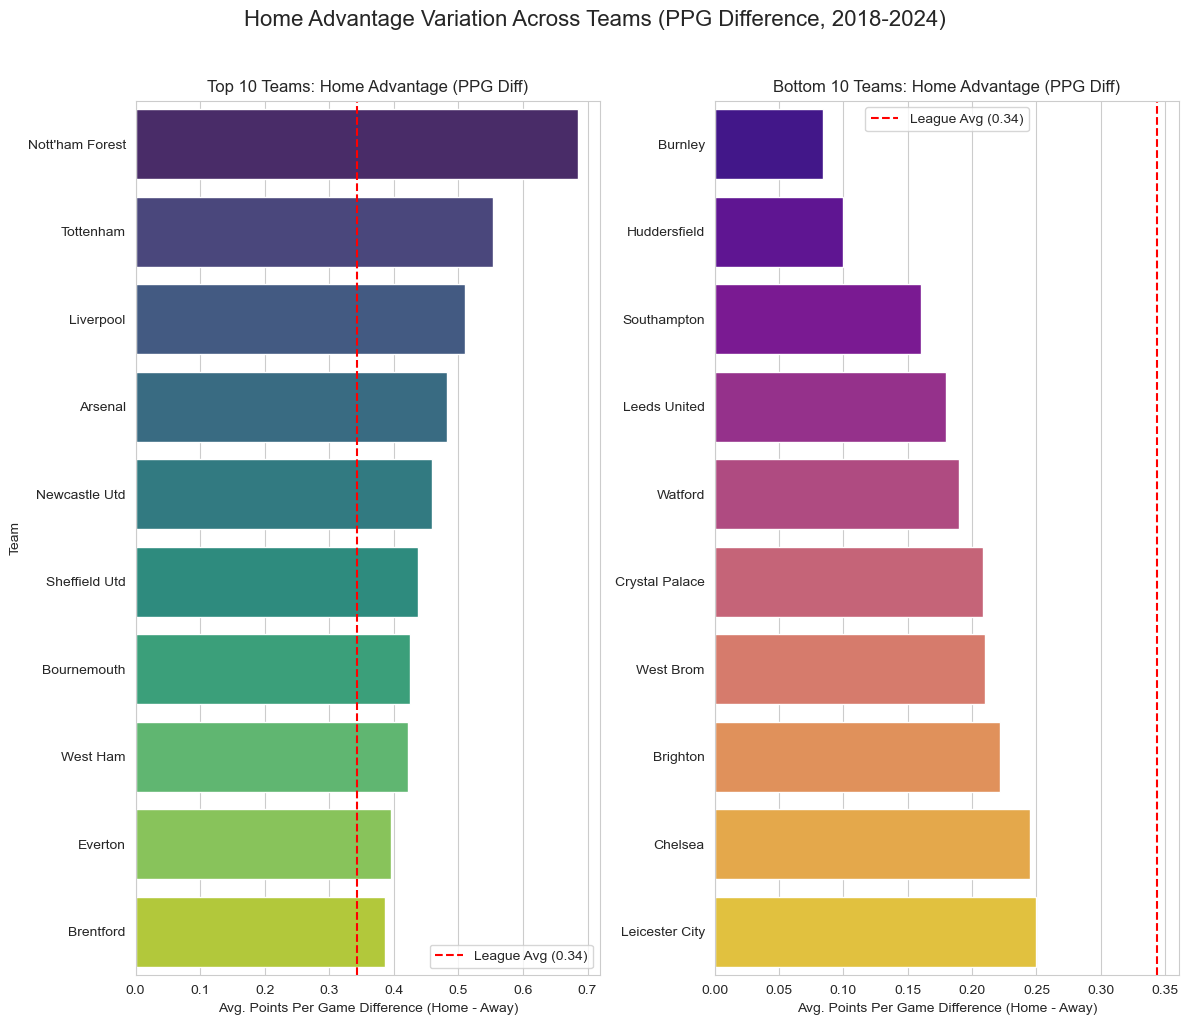

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize Top 10 / Bottom 10 Home Advantage (PPG Diff)

# Check if the dataframes for plotting exist from the previous cell
if 'top_10_ppg' in locals() and 'bottom_10_ppg' in locals() and 'overall_ppg_diff' in locals():
    print("\nGenerating visualization for Top/Bottom 10 teams...")

    # Set the style for the plots
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 10))

    # Subplot 1: Top 10 Teams
    plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st subplot

    # Plot bars for Top 10
    sns.barplot(x='ppg_diff', y='team', data=top_10_ppg, palette='viridis')

    # Add titles and labels
    plt.title('Top 10 Teams: Home Advantage (PPG Diff)')
    plt.xlabel('Avg. Points Per Game Difference (Home - Away)')
    plt.ylabel('Team')

    # Add league average line and its legend
    plt.axvline(x=overall_ppg_diff, color='red', linestyle='--', label=f'League Avg ({overall_ppg_diff:.2f})')
    plt.legend()


    # Subplot 2: Bottom 10 Teams
    plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd subplot

    # Plot bars for Bottom 10
    sns.barplot(x='ppg_diff', y='team', data=bottom_10_ppg, palette='plasma')

    # Add titles and labels
    plt.title('Bottom 10 Teams: Home Advantage (PPG Diff)')
    plt.xlabel('Avg. Points Per Game Difference (Home - Away)')
    plt.ylabel('') # Remove y-label for the second plot for cleaner look

    # Add league average line and its legend
    plt.axvline(x=overall_ppg_diff, color='red', linestyle='--', label=f'League Avg ({overall_ppg_diff:.2f})')
    plt.legend()


    # Final Touches & Saving

    # Add overall title
    plt.suptitle('Home Advantage Variation Across Teams (PPG Difference, 2018-2024)', fontsize=16, y=1.02)
    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0, 1, 1]) # Adjust rect if suptitle overlaps axes titles


    # Define the filename for the plot
    plot_filename = os.path.join(figures_dir, 'top_bottom_10_ppg_diff.png')

    # Save the plot
    try:
        plt.savefig(plot_filename, bbox_inches='tight', dpi=300) # Use bbox_inches='tight' to prevent cutting off labels
        print(f" Plot saved successfully to: {plot_filename}")
    except Exception as e:
        print(f" An error occurred while saving the plot: {e}")

    # Display the plot in the notebook
    plt.show()

else:
    print("\nSkipping visualization because required dataframes (top_10_ppg, bottom_10_ppg) or overall_ppg_diff not available.")
    print(" Ensure the previous cells calculating these have been run successfully.")